In [2]:
# ! pip install pandas
# ! pip install numpy
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install scikit-learn
# ! pip install tensorflow




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [4]:
data = pd.read_csv("../dataset/merged_file.csv")
data.head()

,YEAR,MO,DY,HR,QV2M,RH2M,PRECTOTCORR,PS,WS50M,WD50M
0,2014,1,30,2,5.49,77.56,0.0,98.82,1.48,234.04
1,2014,1,30,3,5.49,77.38,0.0,98.87,1.16,232.13
2,2014,1,30,4,5.49,76.94,0.0,98.92,0.60,236.73
3,2014,1,30,5,5.37,75.94,0.0,98.97,0.17,76.61
4,2014,1,30,6,5.37,80.50,0.0,99.04,1.13,87.24


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87624 entries, 0 to 87623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         87624 non-null  int64  
 1   MO           87624 non-null  int64  
 2   DY           87624 non-null  int64  
 3   HR           87624 non-null  int64  
 4   QV2M         87624 non-null  float64
 5   RH2M         87624 non-null  float64
 6   PRECTOTCORR  87624 non-null  float64
 7   PS           87624 non-null  float64
 8   WS50M        87624 non-null  float64
 9   WD50M        87624 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 6.7 MB


In [6]:
data.describe()

,YEAR,MO,DY,HR,QV2M,RH2M,PRECTOTCORR,PS,WS50M,WD50M
count,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.00000
mean,2018.577878,6.525062,15.724162,11.500000,7.539688,63.238715,0.071239,98.392801,4.885299,154.21860
std,2.883656,3.447813,8.797801,6.922226,2.484511,24.618245,0.319656,0.543349,2.450638,118.46267
min,2014.000000,1.000000,1.000000,0.000000,1.650000,6.250000,0.000000,95.890000,0.020000,0.00000
25%,2016.000000,4.000000,8.000000,5.750000,5.800000,43.810000,0.000000,98.000000,3.090000,37.88750
50%,2019.000000,7.000000,16.000000,11.500000,7.570000,65.120000,0.000000,98.350000,4.570000,150.90500
75%,2021.000000,10.000000,23.000000,17.250000,9.220000,84.940000,0.000000,98.750000,6.370000,260.78250
max,2024.000000,12.000000,31.000000,23.000000,17.090000,100.000000,11.840000,100.430000,19.080000,359.96000


In [7]:
data.isnull().sum()

YEAR           0
MO             0
DY             0
HR             0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS50M          0
WD50M          0
dtype: int64

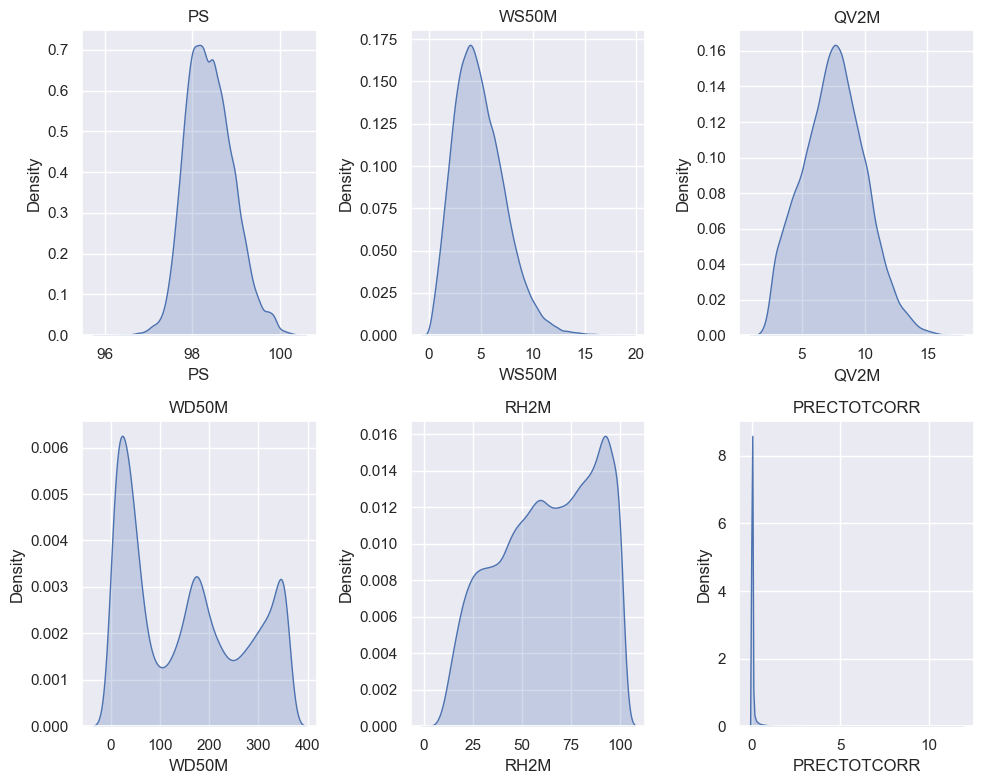

In [9]:
target_columns = ["PS", "WS50M", "QV2M", "WD50M", "RH2M", "PRECTOTCORR"]

# Create the plot
plt.figure(figsize=(10, 8))

# Get the number of subplots needed
num_subplots = len(target_columns)

# Loop through and plot each column
for i, col in enumerate(target_columns):
    # Create the subplot
    plt.subplot(2, 3, i + 1)  # Adjust the number of columns based on your preference

    # Plot the kernel density distribution
    sns.kdeplot(data[col], fill=True)

    # Set the title
    plt.title(col)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# droping all the null values from the data
data = data.dropna()

In [10]:


# Assuming you have a DataFrame named 'data' with columns YEAR, MO, DY, and HR
data["Date/Time"] = pd.to_datetime(data["YEAR"].astype(str) + '-' + data["MO"].astype(str) + '-' + data["DY"].astype(str) + ' ' + data["HR"].astype(str), errors="coerce", format="%Y-%m-%d %H")

data = data.drop(columns=["YEAR", "MO", "DY", "HR"])
print(data)


       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time
0      5.49   77.56          0.0  98.82   1.48  234.04 2014-01-30 02:00:00
1      5.49   77.38          0.0  98.87   1.16  232.13 2014-01-30 03:00:00
2      5.49   76.94          0.0  98.92   0.60  236.73 2014-01-30 04:00:00
3      5.37   75.94          0.0  98.97   0.17   76.61 2014-01-30 05:00:00
4      5.37   80.50          0.0  99.04   1.13   87.24 2014-01-30 06:00:00
...     ...     ...          ...    ...    ...     ...                 ...
87619  3.85   87.31          0.0  99.56   9.02   19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81   20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55   21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83   20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41   18.32 2024-01-29 01:00:00

[87624 rows x 7 columns]


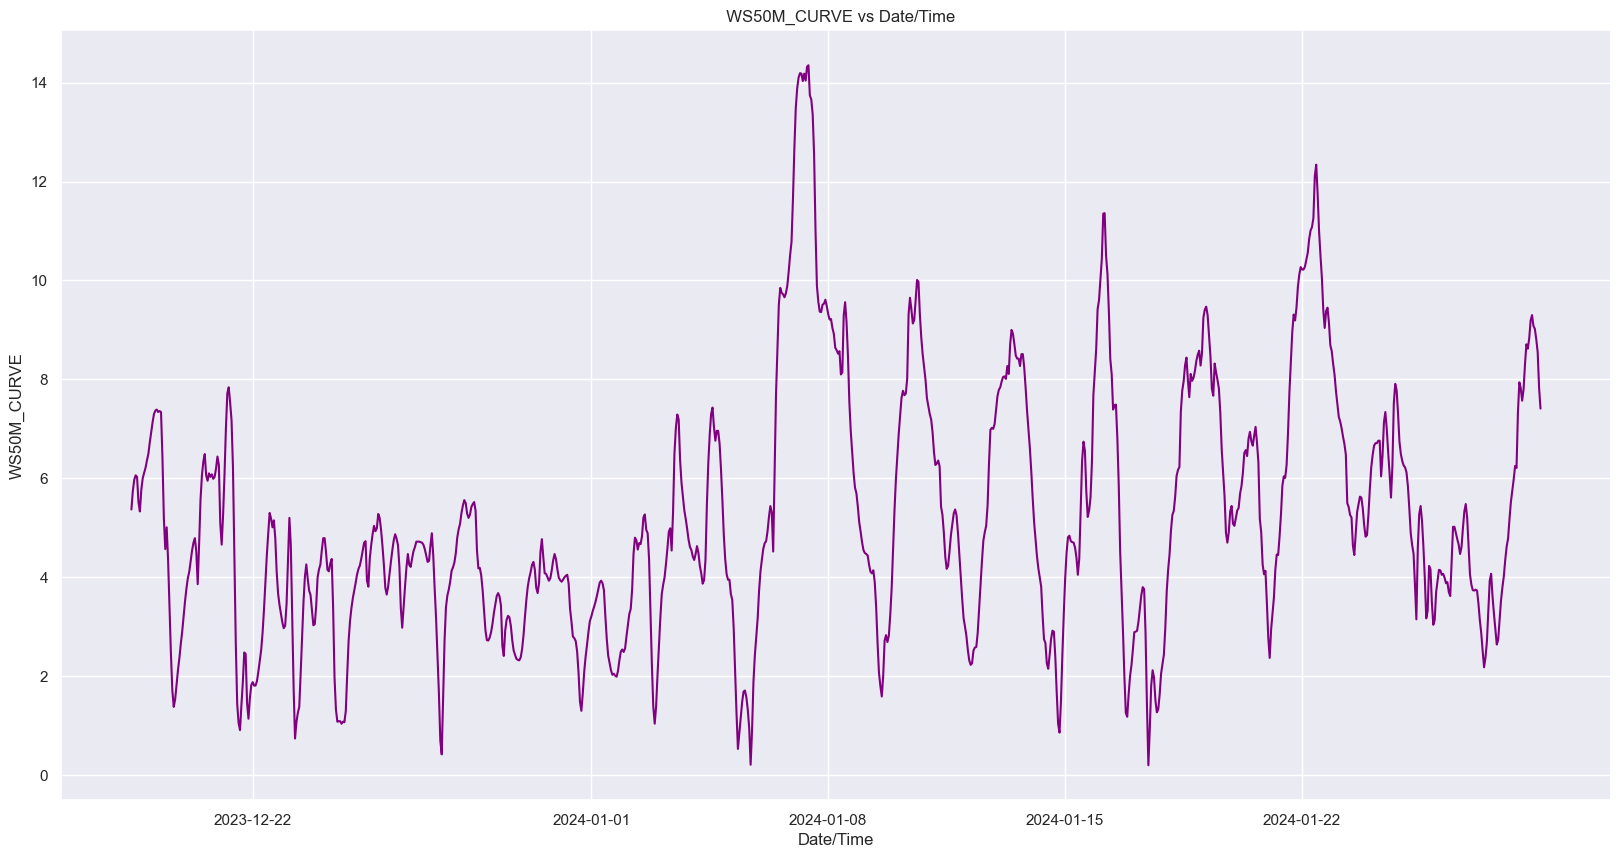

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis, considering the last 1000 data points
ax.plot(data['Date/Time'][-1000:],
        data['WS50M'][-1000:],
        color='purple')

# Set title and labels for axes
ax.set(ylabel="WS50M_CURVE",
       xlabel="Date/Time",
       title="  WS50M_CURVE vs Date/Time")

plt.show()


In [13]:
# Droping all the irrelavent features that dosent affect the target variable.

data.tail()

,QV2M,RH2M,PRECTOTCORR,PS,WS50M,WD50M,Date/Time
87619,3.85,87.31,0.0,99.56,9.02,19.63,2024-01-28 21:00:00
87620,3.85,90.00,0.0,99.55,8.81,20.46,2024-01-28 22:00:00
87621,3.85,92.19,0.0,99.56,8.55,21.10,2024-01-28 23:00:00
87622,3.78,96.75,0.0,99.55,7.83,20.55,2024-01-29 00:00:00
87623,3.78,100.00,0.0,99.57,7.41,18.32,2024-01-29 01:00:00


In [14]:
df1 = data.copy()

print(df1)

       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time
0      5.49   77.56          0.0  98.82   1.48  234.04 2014-01-30 02:00:00
1      5.49   77.38          0.0  98.87   1.16  232.13 2014-01-30 03:00:00
2      5.49   76.94          0.0  98.92   0.60  236.73 2014-01-30 04:00:00
3      5.37   75.94          0.0  98.97   0.17   76.61 2014-01-30 05:00:00
4      5.37   80.50          0.0  99.04   1.13   87.24 2014-01-30 06:00:00
...     ...     ...          ...    ...    ...     ...                 ...
87619  3.85   87.31          0.0  99.56   9.02   19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81   20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55   21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83   20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41   18.32 2024-01-29 01:00:00

[87624 rows x 7 columns]
       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time

In [15]:



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [16]:
# converting the Data/Time as the index for proper shape of the input.
df1 = df1.set_index('Date/Time')

In [17]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [18]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised1(data, lag=1):
    df1 = DataFrame(data)
    columns = [df1.shift(i) for i in range(1, lag+1)]
    columns.append(df1)
    df1 = concat(columns, axis=1)
    df1.fillna(0, inplace=True)
    return df1

In [19]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised2(data, lag=1):
    df2 = DataFrame(data)
    columns = [df2.shift(i) for i in range(1, lag+1)]
    columns.append(df2)
    df2 = concat(columns, axis=1)
    df2.fillna(0, inplace=True)
    return df2

In [20]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [21]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [22]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [23]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [24]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = tf.keras.models.Sequential()
    
    # Use LSTM layer with CuDNN backend if available
    if tf.test.is_gpu_available(cuda_only=True):
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    else:
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, implementation=2))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    
    # Print model summary after training
    print(model.summary())
    
    return model

In [25]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [27]:
'''Drop all the features as we will not be having any in production'''
del df1['QV2M']
del df1['RH2M']
del df1['PRECTOTCORR']
del df1['PS']
del df1['WD50M']
df1.head()





,WS50M
Date/Time,
2014-01-30 02:00:00,1.48
2014-01-30 03:00:00,1.16
2014-01-30 04:00:00,0.60
2014-01-30 05:00:00,0.17
2014-01-30 06:00:00,1.13


In [28]:
for i in range(0,10):
  df1 = df1[:-1]
df1.tail()

,WS50M
Date/Time,
2024-01-28 11:00:00,7.82
2024-01-28 12:00:00,7.57
2024-01-28 13:00:00,7.80
2024-01-28 14:00:00,8.30
2024-01-28 15:00:00,8.71


In [29]:
# transform data to be stationary
raw_values = df1.values
diff_values = difference(raw_values, 1)

In [30]:
# transform data to be supervised learning
supervised = timeseries_to_supervised1(diff_values, lag_exp)
supervised_values = supervised.values

In [31]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [32]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [33]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


86613/86613 [==============================] - 294s 3ms/step - loss: 0.0037
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [34]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 1s 1s/step
Hour=1, Predicted=7.260460, Expected=6.930000
1/1 [==============================] - 0s 48ms/step
Hour=2, Predicted=6.960858, Expected=6.960000
1/1 [==============================] - 0s 44ms/step
Hour=3, Predicted=6.913478, Expected=7.060000
1/1 [==============================] - 0s 45ms/step
Hour=4, Predicted=6.972340, Expected=7.140000
1/1 [==============================] - 0s 48ms/step
Hour=5, Predicted=7.021986, Expected=7.160000
1/1 [==============================] - 0s 44ms/step
Hour=6, Predicted=6.962403, Expected=7.110000
1/1 [==============================] - 0s 44ms/step
Hour=7, Predicted=6.906275, Expected=7.150000
1/1 [==============================] - 0s 49ms/step
Hour=8, Predicted=7.050950, Expected=7.200000
1/1 [==============================] - 0s 40ms/step
Hour=9, Predicted=7.145950, Expected=6.220000
1/1 [==============================] - 0s 40ms/step
Hour=10, Predicted=6.316631, Expected=5.180000
1/1 [================

1/1 [==============================] - 0s 53ms/step
Hour=84, Predicted=6.187393, Expected=4.440000
1/1 [==============================] - 0s 45ms/step
Hour=85, Predicted=4.401261, Expected=2.660000
1/1 [==============================] - 0s 38ms/step
Hour=86, Predicted=2.614553, Expected=1.440000
1/1 [==============================] - 0s 47ms/step
Hour=87, Predicted=1.393046, Expected=1.050000
1/1 [==============================] - 0s 45ms/step
Hour=88, Predicted=1.007260, Expected=0.910000
1/1 [==============================] - 0s 46ms/step
Hour=89, Predicted=0.871476, Expected=1.420000
1/1 [==============================] - 0s 52ms/step
Hour=90, Predicted=1.382939, Expected=1.880000
1/1 [==============================] - 0s 49ms/step
Hour=91, Predicted=1.843317, Expected=2.480000
1/1 [==============================] - 0s 46ms/step
Hour=92, Predicted=2.442753, Expected=2.450000
1/1 [==============================] - 0s 42ms/step
Hour=93, Predicted=2.410429, Expected=1.460000
1/1 [=====

1/1 [==============================] - 0s 38ms/step
Hour=166, Predicted=2.679617, Expected=3.120000
1/1 [==============================] - 0s 44ms/step
Hour=167, Predicted=3.079513, Expected=3.380000
1/1 [==============================] - 0s 45ms/step
Hour=168, Predicted=3.339560, Expected=3.580000
1/1 [==============================] - 0s 40ms/step
Hour=169, Predicted=3.539716, Expected=3.730000
1/1 [==============================] - 0s 51ms/step
Hour=170, Predicted=3.689928, Expected=3.890000
1/1 [==============================] - 0s 48ms/step
Hour=171, Predicted=3.850099, Expected=4.060000
1/1 [==============================] - 0s 51ms/step
Hour=172, Predicted=4.020102, Expected=4.170000
1/1 [==============================] - 0s 58ms/step
Hour=173, Predicted=4.129917, Expected=4.240000
1/1 [==============================] - 0s 45ms/step
Hour=174, Predicted=4.199678, Expected=4.380000
1/1 [==============================] - 0s 46ms/step
Hour=175, Predicted=4.339550, Expected=4.540000


1/1 [==============================] - 0s 43ms/step
Hour=248, Predicted=5.519775, Expected=5.500000
1/1 [==============================] - 0s 46ms/step
Hour=249, Predicted=5.459784, Expected=5.290000
1/1 [==============================] - 0s 44ms/step
Hour=250, Predicted=5.249799, Expected=5.200000
1/1 [==============================] - 0s 46ms/step
Hour=251, Predicted=5.159810, Expected=5.260000
1/1 [==============================] - 0s 51ms/step
Hour=252, Predicted=5.219811, Expected=5.420000
1/1 [==============================] - 0s 47ms/step
Hour=253, Predicted=5.379803, Expected=5.480000
1/1 [==============================] - 0s 51ms/step
Hour=254, Predicted=5.439792, Expected=5.520000
1/1 [==============================] - 0s 41ms/step
Hour=255, Predicted=5.479783, Expected=5.350000
1/1 [==============================] - 0s 43ms/step
Hour=256, Predicted=5.309782, Expected=4.540000
1/1 [==============================] - 0s 37ms/step
Hour=257, Predicted=4.499788, Expected=4.180000


1/1 [==============================] - 0s 38ms/step
Hour=330, Predicted=1.449796, Expected=1.300000
1/1 [==============================] - 0s 47ms/step
Hour=331, Predicted=1.259796, Expected=1.650000
1/1 [==============================] - 0s 38ms/step
Hour=332, Predicted=1.609797, Expected=2.080000
1/1 [==============================] - 0s 50ms/step
Hour=333, Predicted=2.039796, Expected=2.390000
1/1 [==============================] - 0s 49ms/step
Hour=334, Predicted=2.349796, Expected=2.630000
1/1 [==============================] - 0s 46ms/step
Hour=335, Predicted=2.589795, Expected=2.890000
1/1 [==============================] - 0s 43ms/step
Hour=336, Predicted=2.849795, Expected=3.110000
1/1 [==============================] - 0s 49ms/step
Hour=337, Predicted=3.069795, Expected=3.200000
1/1 [==============================] - 0s 43ms/step
Hour=338, Predicted=3.159796, Expected=3.310000
1/1 [==============================] - 0s 44ms/step
Hour=339, Predicted=3.269796, Expected=3.400000


1/1 [==============================] - 0s 47ms/step
Hour=412, Predicted=4.429796, Expected=4.630000
1/1 [==============================] - 0s 48ms/step
Hour=413, Predicted=4.589796, Expected=4.490000
1/1 [==============================] - 0s 42ms/step
Hour=414, Predicted=4.449796, Expected=4.230000
1/1 [==============================] - 0s 50ms/step
Hour=415, Predicted=4.189796, Expected=4.080000
1/1 [==============================] - 0s 44ms/step
Hour=416, Predicted=4.039796, Expected=3.870000
1/1 [==============================] - 0s 46ms/step
Hour=417, Predicted=3.829796, Expected=3.940000
1/1 [==============================] - 0s 43ms/step
Hour=418, Predicted=3.899796, Expected=4.350000
1/1 [==============================] - 0s 53ms/step
Hour=419, Predicted=4.309796, Expected=5.470000
1/1 [==============================] - 0s 46ms/step
Hour=420, Predicted=5.429796, Expected=6.310000
1/1 [==============================] - 0s 44ms/step
Hour=421, Predicted=6.269796, Expected=6.880000


1/1 [==============================] - 0s 48ms/step
Hour=494, Predicted=13.619796, Expected=13.360000
1/1 [==============================] - 0s 45ms/step
Hour=495, Predicted=13.319796, Expected=12.550000
1/1 [==============================] - 0s 50ms/step
Hour=496, Predicted=12.509796, Expected=11.020000
1/1 [==============================] - 0s 48ms/step
Hour=497, Predicted=10.979796, Expected=9.890000
1/1 [==============================] - 0s 46ms/step
Hour=498, Predicted=9.849796, Expected=9.570000
1/1 [==============================] - 0s 52ms/step
Hour=499, Predicted=9.529796, Expected=9.370000
1/1 [==============================] - 0s 44ms/step
Hour=500, Predicted=9.329796, Expected=9.360000
1/1 [==============================] - 0s 39ms/step
Hour=501, Predicted=9.319796, Expected=9.510000
1/1 [==============================] - 0s 39ms/step
Hour=502, Predicted=9.469796, Expected=9.530000
1/1 [==============================] - 0s 37ms/step
Hour=503, Predicted=9.489796, Expected=9.

1/1 [==============================] - 0s 54ms/step
Hour=576, Predicted=7.579796, Expected=7.460000
1/1 [==============================] - 0s 43ms/step
Hour=577, Predicted=7.419796, Expected=7.300000
1/1 [==============================] - 0s 50ms/step
Hour=578, Predicted=7.259796, Expected=7.190000
1/1 [==============================] - 0s 41ms/step
Hour=579, Predicted=7.149796, Expected=6.930000
1/1 [==============================] - 0s 39ms/step
Hour=580, Predicted=6.889796, Expected=6.530000
1/1 [==============================] - 0s 42ms/step
Hour=581, Predicted=6.489796, Expected=6.270000
1/1 [==============================] - 0s 40ms/step
Hour=582, Predicted=6.229796, Expected=6.300000
1/1 [==============================] - 0s 42ms/step
Hour=583, Predicted=6.259796, Expected=6.360000
1/1 [==============================] - 0s 46ms/step
Hour=584, Predicted=6.319796, Expected=6.240000
1/1 [==============================] - 0s 48ms/step
Hour=585, Predicted=6.199796, Expected=5.430000


1/1 [==============================] - 0s 40ms/step
Hour=658, Predicted=3.189796, Expected=2.750000
1/1 [==============================] - 0s 48ms/step
Hour=659, Predicted=2.709796, Expected=2.670000
1/1 [==============================] - 0s 39ms/step
Hour=660, Predicted=2.629796, Expected=2.260000
1/1 [==============================] - 0s 57ms/step
Hour=661, Predicted=2.219796, Expected=2.150000
1/1 [==============================] - 0s 51ms/step
Hour=662, Predicted=2.109796, Expected=2.430000
1/1 [==============================] - 0s 48ms/step
Hour=663, Predicted=2.389796, Expected=2.750000
1/1 [==============================] - 0s 53ms/step
Hour=664, Predicted=2.709796, Expected=2.920000
1/1 [==============================] - 0s 43ms/step
Hour=665, Predicted=2.879796, Expected=2.900000
1/1 [==============================] - 0s 47ms/step
Hour=666, Predicted=2.859796, Expected=2.400000
1/1 [==============================] - 0s 42ms/step
Hour=667, Predicted=2.359796, Expected=1.680000


1/1 [==============================] - 0s 50ms/step
Hour=740, Predicted=1.289796, Expected=1.630000
1/1 [==============================] - 0s 48ms/step
Hour=741, Predicted=1.589796, Expected=2.050000
1/1 [==============================] - 0s 59ms/step
Hour=742, Predicted=2.009796, Expected=2.250000
1/1 [==============================] - 0s 57ms/step
Hour=743, Predicted=2.209796, Expected=2.440000
1/1 [==============================] - 0s 45ms/step
Hour=744, Predicted=2.399796, Expected=2.980000
1/1 [==============================] - 0s 45ms/step
Hour=745, Predicted=2.939796, Expected=3.710000
1/1 [==============================] - 0s 49ms/step
Hour=746, Predicted=3.669796, Expected=4.150000
1/1 [==============================] - 0s 48ms/step
Hour=747, Predicted=4.109796, Expected=4.460000
1/1 [==============================] - 0s 47ms/step
Hour=748, Predicted=4.419796, Expected=4.940000
1/1 [==============================] - 0s 43ms/step
Hour=749, Predicted=4.899796, Expected=5.260000


1/1 [==============================] - 0s 40ms/step
Hour=822, Predicted=3.549796, Expected=4.150000
1/1 [==============================] - 0s 49ms/step
Hour=823, Predicted=4.109796, Expected=4.460000
1/1 [==============================] - 0s 45ms/step
Hour=824, Predicted=4.419796, Expected=4.450000
1/1 [==============================] - 0s 52ms/step
Hour=825, Predicted=4.409796, Expected=4.820000
1/1 [==============================] - 0s 43ms/step
Hour=826, Predicted=4.779796, Expected=5.270000
1/1 [==============================] - 0s 46ms/step
Hour=827, Predicted=5.229796, Expected=5.850000
1/1 [==============================] - 0s 40ms/step
Hour=828, Predicted=5.809796, Expected=6.040000
1/1 [==============================] - 0s 52ms/step
Hour=829, Predicted=5.999796, Expected=6.010000
1/1 [==============================] - 0s 43ms/step
Hour=830, Predicted=5.969796, Expected=6.270000
1/1 [==============================] - 0s 59ms/step
Hour=831, Predicted=6.229796, Expected=6.920000


1/1 [==============================] - 0s 51ms/step
Hour=904, Predicted=6.059796, Expected=5.610000
1/1 [==============================] - 0s 54ms/step
Hour=905, Predicted=5.569796, Expected=6.250000
1/1 [==============================] - 0s 58ms/step
Hour=906, Predicted=6.209796, Expected=7.510000
1/1 [==============================] - 0s 57ms/step
Hour=907, Predicted=7.469796, Expected=7.910000
1/1 [==============================] - 0s 50ms/step
Hour=908, Predicted=7.869796, Expected=7.780000
1/1 [==============================] - 0s 44ms/step
Hour=909, Predicted=7.739796, Expected=7.310000
1/1 [==============================] - 0s 46ms/step
Hour=910, Predicted=7.269796, Expected=6.740000
1/1 [==============================] - 0s 41ms/step
Hour=911, Predicted=6.699796, Expected=6.490000
1/1 [==============================] - 0s 53ms/step
Hour=912, Predicted=6.449796, Expected=6.350000
1/1 [==============================] - 0s 52ms/step
Hour=913, Predicted=6.309796, Expected=6.260000


1/1 [==============================] - 0s 39ms/step
Hour=986, Predicted=4.309796, Expected=4.620000
1/1 [==============================] - 0s 50ms/step
Hour=987, Predicted=4.579796, Expected=4.780000
1/1 [==============================] - 0s 40ms/step
Hour=988, Predicted=4.739796, Expected=5.170000
1/1 [==============================] - 0s 42ms/step
Hour=989, Predicted=5.129796, Expected=5.520000
1/1 [==============================] - 0s 40ms/step
Hour=990, Predicted=5.479796, Expected=5.750000
1/1 [==============================] - 0s 42ms/step
Hour=991, Predicted=5.709796, Expected=5.980000
1/1 [==============================] - 0s 38ms/step
Hour=992, Predicted=5.939796, Expected=6.250000
1/1 [==============================] - 0s 51ms/step
Hour=993, Predicted=6.209796, Expected=6.210000
1/1 [==============================] - 0s 45ms/step
Hour=994, Predicted=6.169796, Expected=7.330000
1/1 [==============================] - 0s 51ms/step
Hour=995, Predicted=7.289796, Expected=7.940000


In [35]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.09900093719871016


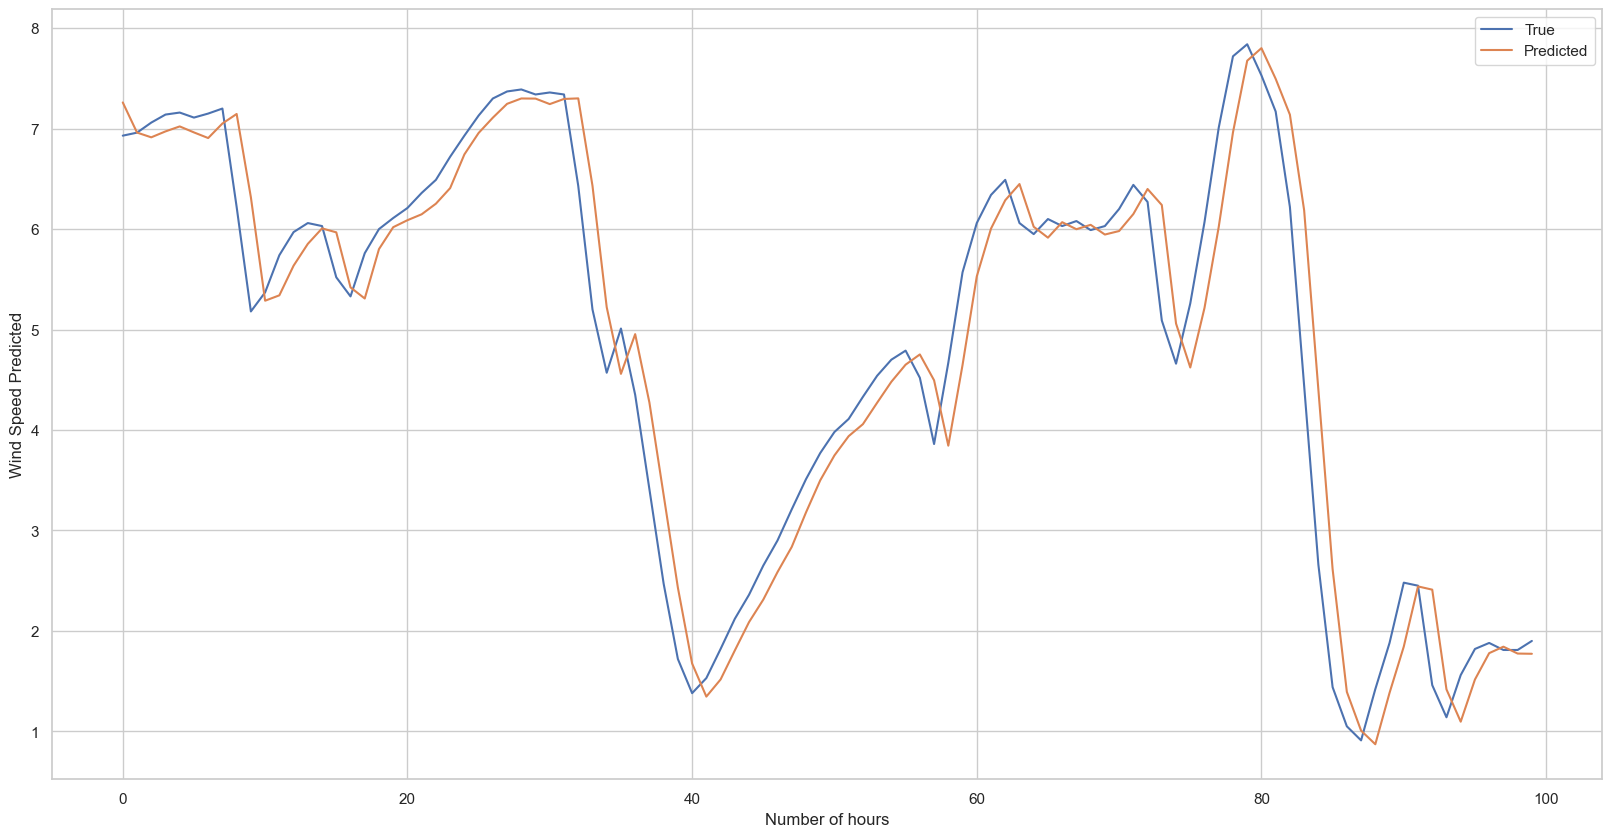

In [36]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Wind Speed Predicted")
pyplot.show()

In [37]:
import pickle 

In [38]:
Pkl_Filename = "Forcasting_WindSpeed.pkl" 

In [39]:
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lstm_model, file)

In [40]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model